f(x) = -12*x**4*sin(cos(x)) - 18*x**3+5*x**2 + 10*x - 30

Определить корни

Найти интервалы, на которых функция возрастает

Найти интервалы, на которых функция убывает

Построить график

Вычислить вершину

Определить промежутки, на котором f > 0

Определить промежутки, на котором f < 0

In [265]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root, fsolve
a, b, c, d, e = -12, -18, 5, 10, -30
start = -10
stop = 10
st = 0.0001
# x = np.arange(start, stop, st)
x = np.linspace(start, stop, num=500)

In [266]:
def func(x):
    return a*x**4*np.sin(np.cos(x)) + b*x**3 + c*x**2 + d*x + e
fx = func(x)

In [268]:
my_roots = []
roots_range = []
for i in range(len(x) - 1):
    if fx[i] < 0 and fx[i + 1] > 0 or fx[i] > 0 and fx[i + 1] < 0:
        x_new = np.arange(x[i], x[i + 1], st)
        roots_range.append(x[i])
        for j in range(len(x_new) - 1):
            if func(x_new[j]) < 0 and func(x_new[j + 1]) > 0 or func(x_new[j]) > 0 and func(x_new[j + 1]) < 0:
                my_roots.append(x_new[j])
my_roots.append(stop)
my_roots

[-7.6506507014028635,
 -5.0269601202404885,
 -1.3389853707414836,
 2.2730290581162493,
 4.383497394789497,
 8.035091983967845,
 10]

In [269]:
roots_range

[-7.675350701402806,
 -5.030060120240481,
 -1.3426853707414832,
 2.2645290581162314,
 4.348697394789578,
 7.9959919839679365]

In [270]:
sol_fsolve = fsolve(func, [[-8], [-5], [-1], [3], [5], [8]])
sol_fsolve

array([-7.65062229, -5.02686593, -1.33896653,  2.27305696,  4.3835237 ,
        8.03516413])

In [271]:
x_min = []
x_max = []
for i in range(len(my_roots) - 1):
    x_range = np.arange(my_roots[i], my_roots[i + 1], 0.01)
    if i % 2 == 0:
        fx_min = min(func(x_range))
    else:
        fx_max = max(func(x_range))
    for el in x_range:
        if (fx_min - 0.01) < func(el) < (fx_min + 0.01):
            x_min.append(el)
        if (fx_max - 0.01) < func(el) < (fx_max + 0.01):
            x_max.append(el)

In [272]:
x_min

[-6.830650701402881, 1.701014629258519, 7.003497394789441]

In [273]:
x_max

[-4.166960120240507, 3.8230290581162163, 9.875091983967806]

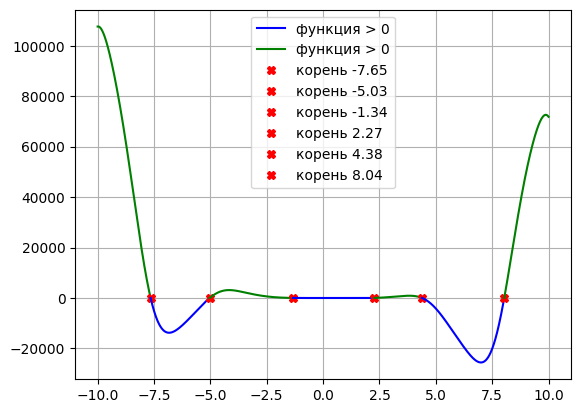

In [274]:
# plt.plot(sol_fsolve, func(sol_fsolve), 'yo')
plt.plot([1], 'b',  label = 'функция > 0')
x_start = np.arange(start, my_roots[0] + st, st)
plt.plot(x_start, func(x_start), 'g', label = 'функция > 0')
for i in range(len(my_roots) - 1):
    plt.plot(my_roots[i], func(my_roots[i]), 'rX', label = f'корень {round(my_roots[i], 2)}')
    if i % 2 == 0:
        xi = np.arange(my_roots[i], my_roots[i + 1] + st, st)
        plt.plot(xi, func(xi), 'b')
    else:
        xi = np.arange(my_roots[i], my_roots[i + 1] + st, st)
        plt.plot(xi, func(xi), 'g')
x_stop = np.arange(my_roots[len(my_roots) - 1], stop + st, st)
plt.plot(x_stop, func(x_stop), 'g')
# plt.plot(my_roots[8], 'rX', label = 'корни')
plt.subplot().legend()
# ax.legend()
plt.grid()

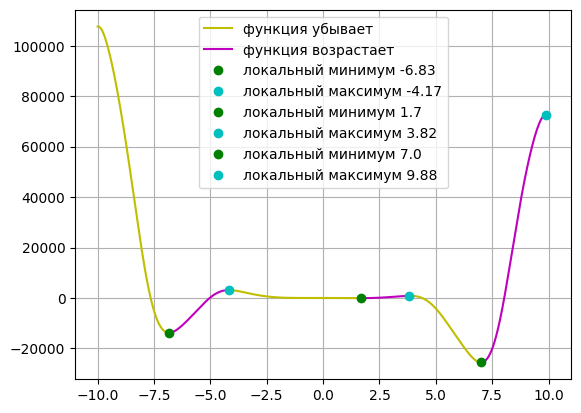

In [276]:

x1 = np.arange(start, x_min[0] + st, st)
plt.plot(x1, func(x1), 'y', label = 'функция убывает')
x2 = np.arange(x_min[0], x_max[0] + st, st)
plt.plot(x2, func(x2), 'm', label = 'функция возрастает')
x3 = np.arange(x_max[0], x_min[1] + st, st)
plt.plot(x3, func(x3), 'y')
x4 = np.arange(x_min[1], x_max[1] + st, st)
plt.plot(x4, func(x4), 'm')
x5 = np.arange(x_max[1], x_min[2] + st, st)
plt.plot(x5, func(x5), 'y')
x6 = np.arange(x_min[2], x_max[2] + st, st)
plt.plot(x6, func(x6), 'm')
x7 = np.arange(x_max[2], stop + st, st)
plt.plot(x7, func(x7), 'y')
for i in range(3):
    plt.plot(x_min[i], func(x_min[i]), 'go', label = f'локальный минимум {round(x_min[i], 2)}')
    plt.plot(x_max[i], func(x_max[i]), 'co', label = f'локальный максимум {round(x_max[i], 2)}')
plt.subplot().legend()
plt.grid()
